In [1]:
print('hello')

hello


In [2]:
 # used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# library written for this exercise providing additional functions for assignment submission, and others
import utils 

# define the submission/grader object for this exercise
grader = utils.Grader()

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [6]:
def warmUpExercise():
    A=np.eye(5)
    return A

In [7]:
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [8]:
grader[1] = warmUpExercise
grader.grade()


Submitting Solutions | Programming Exercise linear-regression

Use token from last successful submission (yonishitjain123456@gmail.com)? (Y/n): UNmcXxI0GsB7rBE5
Login (email address): yonishitjain123456@gmail.com
Token: UNmcXxI0GsB7rBE5
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                           Warm up exercise |  10 /  10 | Nice work!
          Computing Cost (for one variable) |   0 /  40 | 
        Gradient Descent (for one variable) |   0 /  50 | 
                      Feature Normalization |   0 /   0 | 
    Computing Cost (for multiple variables) |   0 /   0 | 
  Gradient Descent (for multiple variables) |   0 /   0 | 
                           Normal Equations |   0 /   0 | 
                                  --------------------------------
                                            |  10 / 100 |  



In [7]:
data = np.loadtxt(os.path.join('data', 'ex1data1.txt'), delimiter=',')
X, y = data[:, 0], data[:, 1]
print(X,y)
print(X.size)


# for a,b in zip(X,y):
#     print(a,b)

[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369] [17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
  6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  5.3048   0.56077  3.6518   5.3893   3.1386  21.767    4.263    5.1875
  

In [10]:
m= X.size
print(m)

97


In [11]:
def plotData(x, y):
    """
    Plots the data points x and y into a new figure. Plots the data 
    points and gives the figure axes labels of population and profit.
    
    Parameters
    ----------
    x : array_like
        Data point values for x-axis.

    y : array_like
        Data point values for y-axis. Note x and y should have the same size.
    
    Instructions
    ------------
    Plot the training data into a figure using the "figure" and "plot"
    functions. Set the axes labels using the "xlabel" and "ylabel" functions.
    Assume the population and revenue data have been passed in as the x
    and y arguments of this function.    
    
    Hint
    ----
    You can use the 'ro' option with plot to have the markers
    appear as red circles. Furthermore, you can make the markers larger by
    using plot(..., 'ro', ms=10), where `ms` refers to marker size. You 
    can also set the marker edge color using the `mec` property.
    """
    fig = pyplot.figure()  # open a new figure
    
    # ====================== YOUR CODE HERE ======================= 
    
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Profit in $10,000')
    pyplot.xlabel('Population of City in 10,000s')
    

    # =============================================================

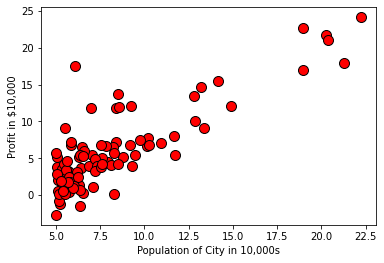

In [12]:
plotData(X,y)

In [13]:
?pyplot.plot

In [14]:
X = np.stack([np.ones(m), X], axis=1)

In [15]:
print(X)

[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1.      7

In [23]:
def computeCost(X, y, theta):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1), where m is the number of examples,
        and n is the number of features. We assume a vector of one's already 
        appended to the features so we have n+1 columns.
    
    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m, ).
    
    theta : array_like
        The parameters for the regression function. This is a vector of 
        shape (n+1, ).
    
    Returns
    -------
    J : float
        The value of the regression cost function.
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. 
    You should set J to the cost.
    """
    
    # initialize some useful values
    m = y.size  # number of training examples
    
    # You need to return the following variables correctly
    J = 0
    
    # ====================== YOUR CODE HERE =====================
#     theta=theta.reshape(2,1)
    prediction = X.dot(theta)
#     print(prediction)
    square_err=(prediction - y)**2
#     print(square_err)
    
    J  = (1/(2*m)) * np.sum(square_err)
    
    # ===========================================================
    return J

                 
    

In [24]:
print(np.array([0,0]).reshape(2,1))
J = computeCost(X, y, theta=np.array([0,0]))
print(J)
J = computeCost(X, y, theta=np.array([-1,2]))
print('With theta = [-1, 2]\nCost computed = %.2f' % J)
print('Expected cost value (approximately) 54.24')

[[0]
 [0]]
32.072733877455676
With theta = [-1, 2]
Cost computed = 54.24
Expected cost value (approximately) 54.24


In [25]:
grader[2] = computeCost
grader.grade()


Submitting Solutions | Programming Exercise linear-regression

Use token from last successful submission (yonishitjain123456@gmail.com)? (Y/n): y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                           Warm up exercise |  10 /  10 | Nice work!
          Computing Cost (for one variable) |  40 /  40 | Nice work!
        Gradient Descent (for one variable) |   0 /  50 | 
                      Feature Normalization |   0 /   0 | 
    Computing Cost (for multiple variables) |   0 /   0 | 
  Gradient Descent (for multiple variables) |   0 /   0 | 
                           Normal Equations |   0 /   0 | 
                                  --------------------------------
                                            |  50 / 100 |  

